In [ ]:
# Step 1: Install and import required libraries
!pip install pandas matplotlib seaborn wordcloud nltk --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Step 2: Load the data (replace with your file path if using local upload)
from google.colab import files
uploaded = files.upload()  # upload your CSV file

# Assuming your uploaded file is called 'airline_reviews.csv'
df = pd.read_csv(next(iter(uploaded)))


Saving british-airways-review.csv to british-airways-review.csv


In [ ]:
# Step 3: Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reviewer  0 non-null      float64
 1   Date      0 non-null      float64
 2   Rating    0 non-null      float64
 3   Review    0 non-null      float64
dtypes: float64(4)
memory usage: 132.0 bytes


,Reviewer,Date,Rating,Review


In [ ]:
# Extend stopwords with domain-specific airline words
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'ba', 'flight', 'airline', 'flights', 'airways',
    '✅', 'trip', 'verified', '|','british','us','would','one','cabin'
])

def clean_text(text):
    if pd.isnull(text):
        return ""

    # Lowercase and remove specific phrases
    text = text.lower()
    text = re.sub(r'✅ trip verified \|', '', text)

    # Tokenize and clean
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    filtered = [word for word in words if word not in custom_stopwords]  # Remove stopwords + custom

    return " ".join(filtered)

# Apply the function to your reviews column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

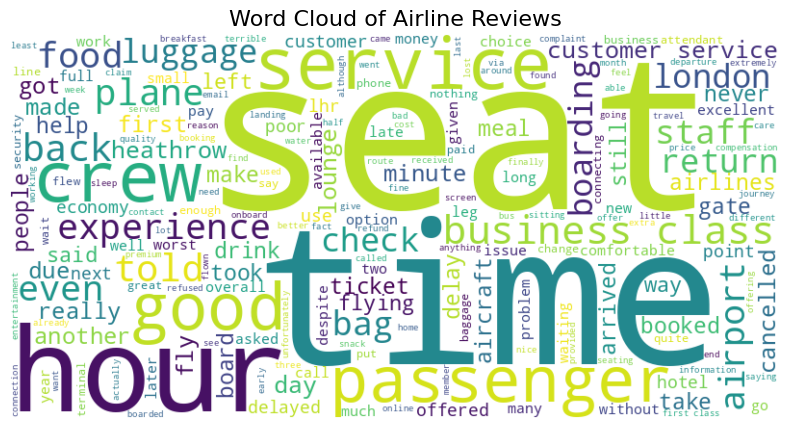

In [ ]:
# Step 5: Generate Word Cloud
text = " ".join(df['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Airline Reviews', fontsize=16)
plt.show()

<ipython-input-44-3f59dc8eec19>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


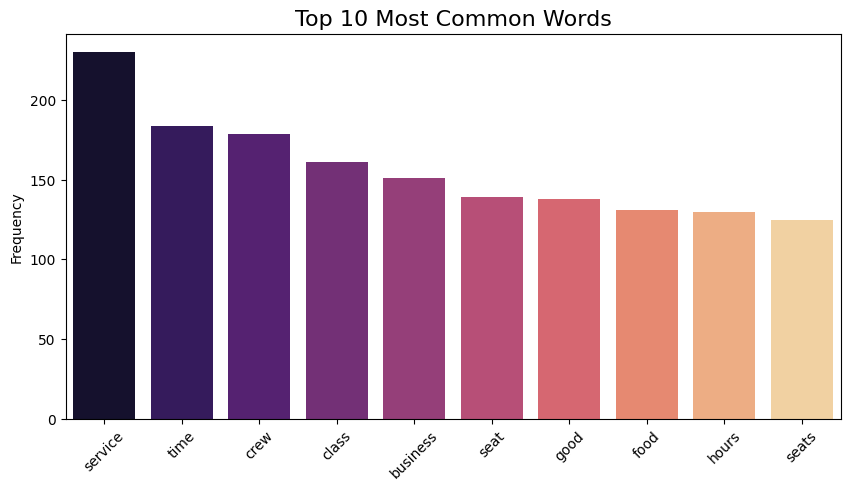

In [ ]:
# Step 6: Bar Chart of Most Common Words
from collections import Counter
all_words = " ".join(df['cleaned_reviews']).split()
common_words = Counter(all_words).most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Top 10 Most Common Words', fontsize=16)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

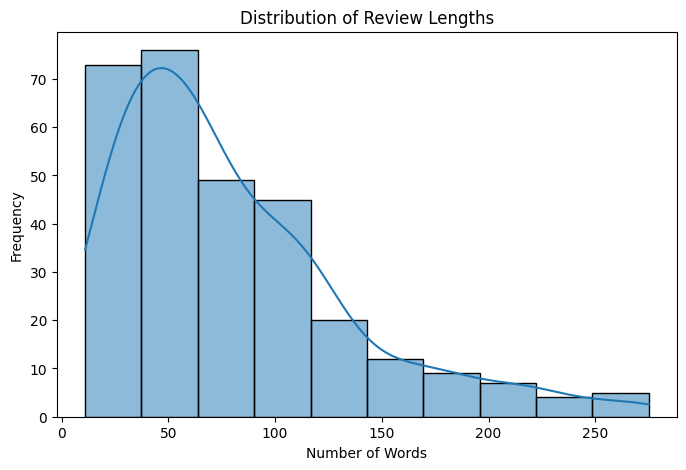

In [ ]:
# Step 6: Review length analysis
df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=10, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Step 7: Sentiment Analysis
df['polarity'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

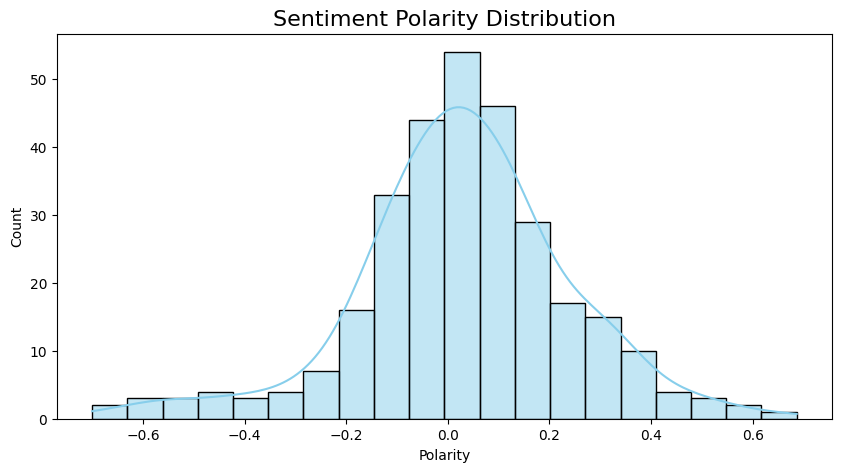

In [ ]:
# Step 8: Sentiment Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(df['polarity'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Polarity Distribution', fontsize=16)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

The sentiment polarity distribution of British Airways reviews shows that most customer feedback is **neutral to mildly positive**, with the polarity scores centered around zero. While there are some clearly positive and negative reviews, extreme sentiments are relatively rare. This suggests that customers generally have **balanced opinions**, with experiences ranging from satisfactory to slightly disappointing or pleasant, rather than strongly favorable or unfavorable. Overall, the sentiment trend indicates a **moderate level of customer satisfaction**.


In [ ]:
def preprocess_text(text):
    """Preprocess text data by converting to lowercase, removing punctuation, and stopwords."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text into words
    stop_words = set(stopwords.words('english'))  # Get stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment


In [ ]:
from textblob import TextBlob

def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment


In [ ]:
# Preprocess text and apply sentiment analysis (both VADER and TextBlob)
df['cleaned_heading'] = df['heading1'].apply(preprocess_text)
df['cleaned_reviews'] = df['reviews'].apply(preprocess_text)

# Apply VADER sentiment analysis
df['sentiment_vader_heading'] = df['cleaned_heading'].apply(analyze_sentiment_vader)
df['sentiment_vader_review'] = df['cleaned_reviews'].apply(analyze_sentiment_vader)

# Apply TextBlob sentiment analysis
df['sentiment_textblob_heading'] = df['cleaned_heading'].apply(analyze_sentiment_textblob)
df['sentiment_textblob_review'] = df['cleaned_reviews'].apply(analyze_sentiment_textblob)

print(df[['web-scraper-order', 'sentiment_vader_heading', 'sentiment_vader_review', 'sentiment_textblob_heading', 'sentiment_textblob_review']])

    web-scraper-order sentiment_vader_heading sentiment_vader_review  \
0        1746945064-1                 Neutral               Positive   
1        1746945064-2                 Neutral               Positive   
2        1746945064-3                Negative               Positive   
3        1746945064-4                Negative               Negative   
4        1746945064-5                 Neutral               Negative   
..                ...                     ...                    ...   
295    1746945089-296                 Neutral               Negative   
296    1746945089-297                 Neutral               Negative   
297    1746945089-298                 Neutral               Negative   
298    1746945089-299                Positive               Positive   
299    1746945089-300                Positive               Positive   

    sentiment_textblob_heading sentiment_textblob_review  
0                      Neutral                  Positive  
1                

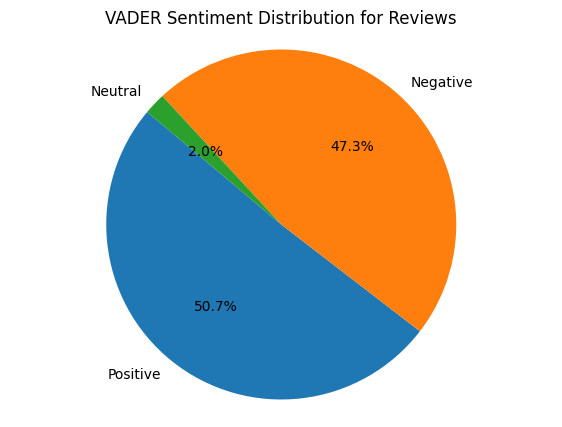

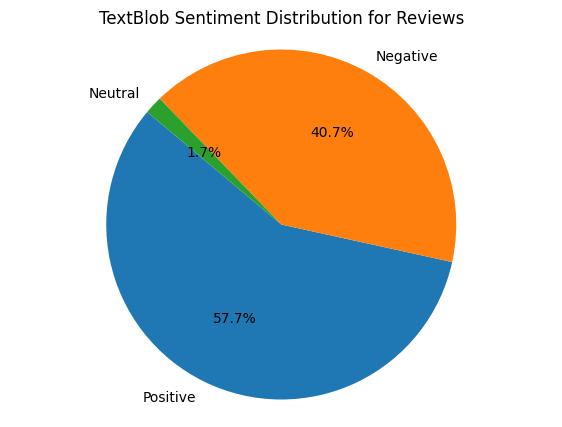

    web-scraper-order sentiment_vader_heading sentiment_vader_review  \
0        1746945064-1                 Neutral               Positive   
1        1746945064-2                 Neutral               Positive   
2        1746945064-3                Negative               Positive   
3        1746945064-4                Negative               Negative   
4        1746945064-5                 Neutral               Negative   
..                ...                     ...                    ...   
295    1746945089-296                 Neutral               Negative   
296    1746945089-297                 Neutral               Negative   
297    1746945089-298                 Neutral               Negative   
298    1746945089-299                Positive               Positive   
299    1746945089-300                Positive               Positive   

    sentiment_textblob_heading sentiment_textblob_review  
0                      Neutral                  Positive  
1                

In [ ]:
# Visualize sentiment distribution
def plot_sentiment_distribution(sentiments, title='Sentiment Distribution'):
    sentiment_counts = sentiments.value_counts()  # Correct way to count unique values

    labels = sentiment_counts.index
    sizes = sentiment_counts.values

    plt.figure(figsize=(7, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot sentiment distribution for VADER and TextBlob
plot_sentiment_distribution(df['sentiment_vader_review'], 'VADER Sentiment Distribution for Reviews')
plot_sentiment_distribution(df['sentiment_textblob_review'], 'TextBlob Sentiment Distribution for Reviews')

# Display the DataFrame with sentiment columns
print(df[['web-scraper-order', 'sentiment_vader_heading', 'sentiment_vader_review', 'sentiment_textblob_heading', 'sentiment_textblob_review']])

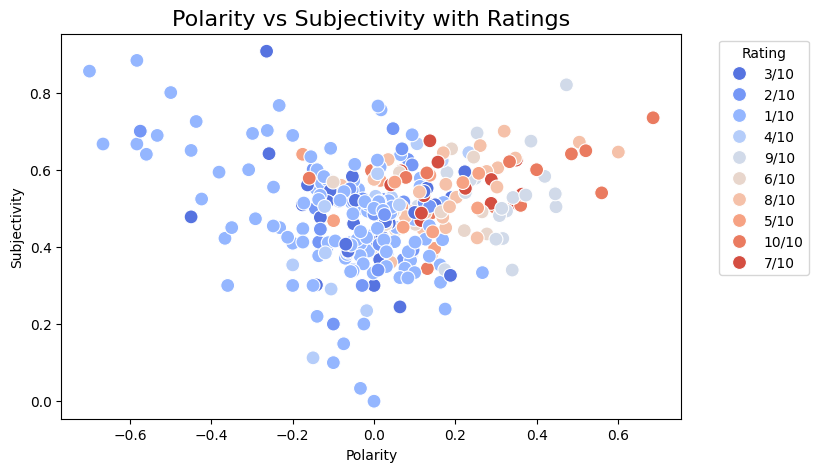

In [ ]:
# Step 9: Scatter Plot: Polarity vs Subjectivity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='rating', palette='coolwarm', s=100)
plt.title('Polarity vs Subjectivity with Ratings', fontsize=16)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot of British Airways reviews reveals a clear relationship between customer sentiment and their given ratings. Reviews with **higher ratings (7–10/10)** tend to have **positive sentiment polarity**, indicating generally favorable opinions. In contrast, **lower ratings (1–4/10)** are often linked with **neutral to negative polarity**, reflecting dissatisfaction. Most reviews are moderately subjective, suggesting that passengers include both **personal experiences and factual details** in their feedback. Overall, the sentiment analysis aligns well with the ratings, showing that **more positive language corresponds to higher satisfaction** among customers.


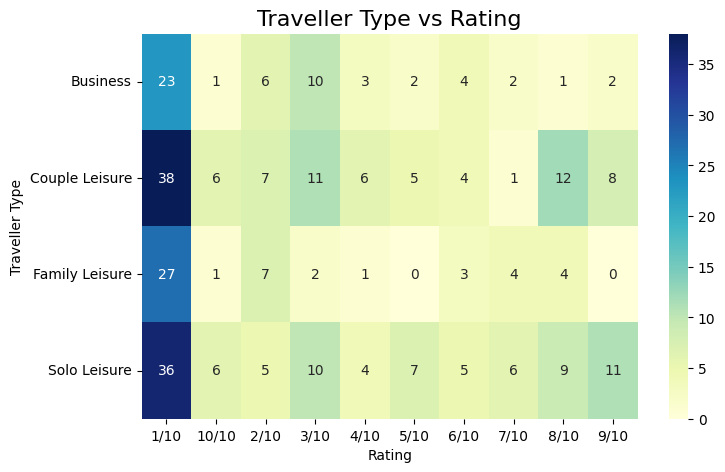

In [ ]:
# Step 10: Heatmap of Traveller Type vs Rating
plt.figure(figsize=(8, 5))
heat_data = pd.crosstab(df['traveller-type'], df['rating'])
sns.heatmap(heat_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Traveller Type vs Rating', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Traveller Type')
plt.show()

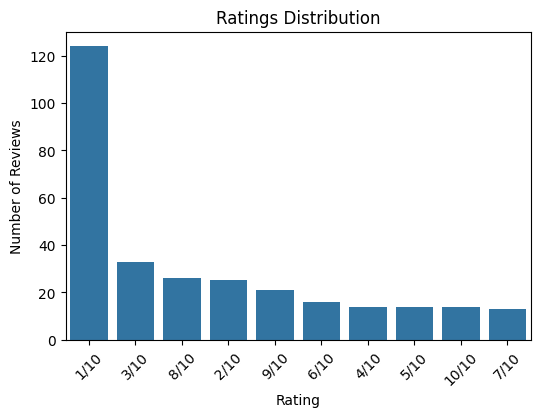

In [ ]:
# Step 7: Ratings distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

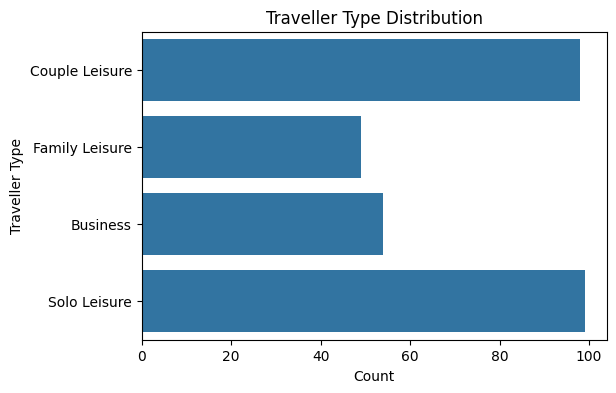

In [ ]:
# Optional: Traveller type analysis
plt.figure(figsize=(6, 4))
sns.countplot(y='traveller-type', data=df)
plt.title("Traveller Type Distribution")
plt.xlabel("Count")
plt.ylabel("Traveller Type")
plt.show()